In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
xls = pd.ExcelFile('International_Finance_Statistics -Australia.xlsx')
df1 = pd.read_excel(xls, 'total_aus')


In [3]:
xls2 = pd.ExcelFile('International_Finance_Statistics -Japan.xlsx')
df2 = pd.read_excel(xls2, 'total_jap')

In [4]:
xls3 = pd.ExcelFile('International_Finance_Statistics-US.xlsx')
df3 = pd.read_excel(xls3, 'total_US')

In [5]:
xls4 = pd.ExcelFile('VIX_History.xlsx')
df4 = pd.read_excel(xls4)

In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8129 entries, 0 to 8128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    8129 non-null   datetime64[ns]
 1   CLOSE   8129 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 127.1 KB


In [7]:
df1.head()

,Indicator,"National Currency per SDR, End of Period_aus",Central Bank Policy Rate_aus,Money Market Rate_aus,Savings Rate_aus,Deposit Rate_aus,Lending Rate_aus,Government Bonds_aus,Consumer Prices_aus,Unemployment Rate (%)_aus,"Goods, Volume of Exports, US Dollars, Index_aus","Goods, Volume of Imports, Index_aus","Export Price Index, All Commodities, Index_aus","Import Price Index, All Commodities, Index_aus"
0,NaN,Rate,Percent per Annum,Percent per Annum,Percent per Annum,Percent per Annum,Percent per Annum,Percent per Annum,Index,Percent,Units,Units,Units,Units
1,Scale,Units,Units,Units,Units,Units,Units,Units,Units,Units,2010=100,2010=100,2010=100,2010=100
2,Base Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010=100,NaN,NaN,NaN,NaN,NaN
3,2009. 01,2.31737,NaN,4.25,NaN,NaN,NaN,NaN,96.25,5.32,NaN,NaN,119.65,92.902561
4,2009. 02,2.273574,NaN,3.35,NaN,NaN,NaN,NaN,96.25,5.97,NaN,NaN,119.65,92.180787


In [8]:
df1=df1.iloc[3:,:]
df2=df2.iloc[3:,:]
df3=df3.iloc[3:,:]
#df1.head()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 3 to 128
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Indicator                                        126 non-null    object
 1   National Currency per SDR, End of Period_aus     126 non-null    object
 2   Central Bank Policy Rate_aus                     66 non-null     object
 3   Money Market Rate_aus                            126 non-null    object
 4   Savings Rate_aus                                 66 non-null     object
 5   Deposit Rate_aus                                 66 non-null     object
 6   Lending Rate_aus                                 66 non-null     object
 7   Government Bonds_aus                             66 non-null     object
 8   Consumer Prices_aus                              126 non-null    object
 9   Unemployment Rate (%)_aus                  

In [10]:
df1.set_index("Indicator", inplace = True)
df2.set_index("Indicator", inplace = True)
df3.set_index("Indicator", inplace = True)
df4.set_index("DATE",inplace=True)

In [11]:
df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)
df3.index = pd.to_datetime(df3.index)
df4.index=pd.to_datetime(df4.index)

In [12]:
df1.index.name="date"
df2.index.name="date"
df3.index.name="date"
df4.index.name="date"

In [13]:
df4

,CLOSE
date,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2022-04-05,21.03
2022-04-06,22.10
2022-04-07,21.55


In [14]:
df_m = df4.resample("M").last()
df_m = df_m[['CLOSE']]
df_m['VIX'] = df_m.CLOSE.pct_change()
df_m = df_m[231:354]
df_m.index = pd.to_datetime(df_m.index, format = '%Y-%m-%d').strftime('%Y-%m-01')
df_m.index=pd.to_datetime(df_m.index)

In [15]:
df_m

,CLOSE,VIX
date,,
2009-04-01,36.50,-0.173086
2009-05-01,28.92,-0.207671
2009-06-01,26.35,-0.088866
2009-07-01,25.92,-0.016319
2009-08-01,26.01,0.003472
...,...,...
2019-02-01,14.70,-0.112855
2019-03-01,13.71,-0.067347
2019-04-01,13.12,-0.043034


In [16]:
df1.mean()
df1=df1.fillna(df1.mean())
df2.mean()
df2=df2.fillna(df2.mean())
df3.mean()
df3=df3.fillna(df3.mean())

In [17]:
df1

,"National Currency per SDR, End of Period_aus",Central Bank Policy Rate_aus,Money Market Rate_aus,Savings Rate_aus,Deposit Rate_aus,Lending Rate_aus,Government Bonds_aus,Consumer Prices_aus,Unemployment Rate (%)_aus,"Goods, Volume of Exports, US Dollars, Index_aus","Goods, Volume of Imports, Index_aus","Export Price Index, All Commodities, Index_aus","Import Price Index, All Commodities, Index_aus"
date,,,,,,,,,,,,,
2009-01-01,2.317370,1.829545,4.25,2.556061,2.231061,5.475848,2.72,96.250000,5.32,126.860937,121.050064,119.650000,92.902561
2009-02-01,2.273574,1.829545,3.35,2.556061,2.231061,5.475848,2.72,96.250000,5.97,126.860937,121.050064,119.650000,92.180787
2009-03-01,2.175287,1.829545,3.25,2.556061,2.231061,5.475848,2.72,96.250000,6.04,126.860937,121.050064,119.650000,90.943461
2009-04-01,2.061708,1.829545,3.06,2.556061,2.231061,5.475848,2.72,96.670000,5.57,126.860937,121.050064,95.050000,91.665235
2009-05-01,1.956585,1.829545,3.00,2.556061,2.231061,5.475848,2.72,96.670000,5.83,126.860937,121.050064,95.050000,93.108782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,1.956305,1.500000,1.50,2.150000,1.950000,5.366000,2.13,118.730489,5.38,128.178964,122.062488,122.113503,114.300280
2019-03-01,1.958869,1.500000,1.50,2.150000,1.900000,5.366000,1.96,118.730489,5.41,128.178964,122.062488,122.113503,114.300280
2019-04-01,1.968688,1.500000,1.50,2.150000,1.900000,5.366000,1.86,119.458897,5.27,137.362637,123.979298,126.698351,115.319908


In [18]:
df1.rename(columns = {'National Currency per SDR, End of Period_aus':'USDAUS', 'Export Price Index, All Commodities, Index_aus':'export_aus'}, inplace = True)

In [19]:
x1 = df1.iloc[:,1:12]
y1 = df1['USDAUS']

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2009-01-01 to 2019-06-01
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   National Currency per SDR, End of Period_jap     126 non-null    float64
 1   Central Bank Policy Rate_jap                     94 non-null     object 
 2   Discount Rate_jap                                126 non-null    float64
 3   Money Market Rate_jap                            126 non-null    float64
 4   Treasury Bill Rate_jap                           126 non-null    float64
 5   Deposit Rate_jap                                 126 non-null    float64
 6   Lending Rate_jap                                 126 non-null    float64
 7   Government Bonds_jap                             126 non-null    float64
 8   Consumer Prices_jap                              126 non-null    float64
 9   Unemployment 

In [21]:
df2.rename(columns = {'National Currency per SDR, End of Period_jap':'USDJPY', 'Export Price Index, All Commodities, Index_jap':'export_jap'}, inplace = True)

In [22]:
x2 = df2.iloc[:,1:14]
y2 = df2['USDJPY']

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2009-01-01 to 2019-06-01
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   National Currency per SDR, End of Period_us     126 non-null    float64
 1   Central Bank Policy Rate_us                     126 non-null    float64
 2   Discount Rate_us                                126 non-null    float64
 3   Money Market Rate_us                            126 non-null    float64
 4   Treasury Bill Rate_us                           126 non-null    float64
 5   Lending Rate_us                                 126 non-null    float64
 6   Government Bonds_us                             126 non-null    float64
 7   Unemployment Rate (%)_us                        126 non-null    float64
 8   Consumer Prices_us                              126 non-null    float64
 9   Goods, Volume of Exports

In [24]:
merged_df_aus = pd.merge(df1[['USDAUS','Money Market Rate_aus','export_aus','Consumer Prices_aus',"Unemployment Rate (%)_aus"]], df3[['Export Price Index, All Commodities, Index_us','Consumer Prices_us',"Money Market Rate_us","Unemployment Rate (%)_us"]],
                         on="date")
merged_df_aus

,USDAUS,Money Market Rate_aus,export_aus,Consumer Prices_aus,Unemployment Rate (%)_aus,"Export Price Index, All Commodities, Index_us",Consumer Prices_us,Money Market Rate_us,Unemployment Rate (%)_us
date,,,,,,,,,
2009-01-01,2.317370,4.25,119.650000,96.250000,5.32,94.700508,96.829935,0.15,8.48
2009-02-01,2.273574,3.35,119.650000,96.250000,5.97,94.456853,97.311464,0.22,8.91
2009-03-01,2.175287,3.25,119.650000,96.250000,6.04,93.807107,97.548101,0.18,9.04
2009-04-01,2.061708,3.06,95.050000,96.670000,5.57,94.294416,97.791617,0.15,8.61
2009-05-01,1.956585,3.00,95.050000,96.670000,5.83,94.700508,98.074114,0.18,9.05
...,...,...,...,...,...,...,...,...,...
2019-02-01,1.956305,1.50,122.113503,118.730489,5.38,104.610942,115.922781,2.40,4.07
2019-03-01,1.958869,1.50,122.113503,118.730489,5.41,105.059146,116.576743,2.41,3.92
2019-04-01,1.968688,1.50,126.698351,119.458897,5.27,105.417710,117.194017,2.42,3.32


In [25]:
merged_df_aus["diff_export"]=merged_df_aus["Export Price Index, All Commodities, Index_us"]-merged_df_aus["export_aus"]
merged_df_aus["diff_consumer"]=merged_df_aus["Consumer Prices_us"]-merged_df_aus["Consumer Prices_aus"]
merged_df_aus["diff_rate"]=merged_df_aus['Money Market Rate_us']-merged_df_aus['Money Market Rate_aus']
merged_df_aus["diff_unemployee"]=merged_df_aus['Unemployment Rate (%)_us']-merged_df_aus['Unemployment Rate (%)_aus']
merged_df_aus=merged_df_aus.drop(['export_aus', 'Consumer Prices_aus',"Money Market Rate_aus",
                                  'Money Market Rate_us',
                                 "Export Price Index, All Commodities, Index_us","Consumer Prices_us","Unemployment Rate (%)_aus","Unemployment Rate (%)_us"], axis=1)


In [26]:
merged_df_aus

,USDAUS,diff_export,diff_consumer,diff_rate,diff_unemployee
date,,,,,
2009-01-01,2.317370,-24.949492,0.579935,-4.10,3.16
2009-02-01,2.273574,-25.193147,1.061464,-3.13,2.94
2009-03-01,2.175287,-25.842893,1.298101,-3.07,3.00
2009-04-01,2.061708,-0.755584,1.121617,-2.91,3.04
2009-05-01,1.956585,-0.349492,1.404114,-2.82,3.22
...,...,...,...,...,...
2019-02-01,1.956305,-17.502561,-2.807708,0.90,-1.31
2019-03-01,1.958869,-17.054356,-2.153746,0.91,-1.49
2019-04-01,1.968688,-21.280640,-2.264880,0.92,-1.95


In [27]:
df_m

,CLOSE,VIX
date,,
2009-04-01,36.50,-0.173086
2009-05-01,28.92,-0.207671
2009-06-01,26.35,-0.088866
2009-07-01,25.92,-0.016319
2009-08-01,26.01,0.003472
...,...,...
2019-02-01,14.70,-0.112855
2019-03-01,13.71,-0.067347
2019-04-01,13.12,-0.043034


In [28]:
merged_df_aus = pd.merge(merged_df_aus[['USDAUS','diff_export','diff_consumer','diff_rate',"diff_unemployee"]],df_m[["VIX"]],
                         on="date")

In [29]:
merged_df_aus

,USDAUS,diff_export,diff_consumer,diff_rate,diff_unemployee,VIX
date,,,,,,
2009-04-01,2.061708,-0.755584,1.121617,-2.91,3.04,-0.173086
2009-05-01,1.956585,-0.349492,1.404114,-2.82,3.22,-0.207671
2009-06-01,1.913022,0.625127,2.246560,-2.79,3.95,-0.088866
2009-07-01,1.875776,9.470254,1.149719,-2.84,4.46,-0.016319
2009-08-01,1.865915,10.038782,1.371223,-2.84,4.07,0.003472
...,...,...,...,...,...,...
2019-02-01,1.956305,-17.502561,-2.807708,0.90,-1.31,-0.112855
2019-03-01,1.958869,-17.054356,-2.153746,0.91,-1.49,-0.067347
2019-04-01,1.968688,-21.280640,-2.264880,0.92,-1.95,-0.043034


In [30]:
merged_df_jap = pd.merge(df2[['USDJPY','Consumer Prices_jap','export_jap','Money Market Rate_jap',"Production_Prices_jap","Unemployment Rate (%)_jap"]], 
                         df3[['Consumer Prices_us', 'Export Price Index, All Commodities, Index_us','Money Market Rate_us',"Production_Prices_us","Unemployment Rate (%)_us"]], 
                         on="date")
merged_df_jap

,USDJPY,Consumer Prices_jap,export_jap,Money Market Rate_jap,Production_Prices_jap,Unemployment Rate (%)_jap,Consumer Prices_us,"Export Price Index, All Commodities, Index_us",Money Market Rate_us,Production_Prices_us,Unemployment Rate (%)_us
date,,,,,,,,,,,
2009-01-01,133.676277,101.122118,99.546638,0.12000,102.139699,4.28,96.829935,94.700508,0.15,94.806458,8.48
2009-02-01,143.141392,100.811292,100.125398,0.11100,101.651459,4.59,97.311464,94.456853,0.22,93.754283,8.91
2009-03-01,146.666806,101.122118,104.176715,0.10000,101.456163,5.11,97.548101,93.807107,0.18,93.089752,9.04
2009-04-01,146.188319,101.225727,105.565737,0.10400,100.772628,5.15,97.791617,94.294416,0.15,93.643528,8.61
2009-05-01,149.386817,101.018509,103.829459,0.10200,100.382037,5.25,98.074114,94.700508,0.18,94.584947,9.05
...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,155.021529,105.150290,99.083631,0.06406,100.497420,2.30,115.922781,104.610942,2.40,114.334876,4.07
2019-03-01,153.984765,105.150290,98.736375,0.06406,100.010985,2.50,116.576743,105.059146,2.41,113.792423,3.92
2019-04-01,154.789323,105.466690,98.736375,0.06406,99.913698,2.60,117.194017,105.417710,2.42,114.159272,3.32


In [31]:
merged_df_jap["diff_consumer"]=merged_df_jap["Consumer Prices_us"]-merged_df_jap["Consumer Prices_jap"]
#merged_df_jap["diff_export"]=merged_df_jap["Export Price Index, All Commodities, Index_jap"]-merged_df_jap["Export Price Index, All Commodities, Index_us"]
merged_df_jap["diff_money_market"]=merged_df_jap["Money Market Rate_us"]-merged_df_jap["Money Market Rate_jap"]
merged_df_jap["diff_production"]=merged_df_jap["Production_Prices_us"]-merged_df_jap["Production_Prices_jap"]
merged_df_jap["diff_unmployee"]=merged_df_jap["Unemployment Rate (%)_us"]-merged_df_jap["Production_Prices_jap"]

In [32]:
merged_df_jap

,USDJPY,Consumer Prices_jap,export_jap,Money Market Rate_jap,Production_Prices_jap,Unemployment Rate (%)_jap,Consumer Prices_us,"Export Price Index, All Commodities, Index_us",Money Market Rate_us,Production_Prices_us,Unemployment Rate (%)_us,diff_consumer,diff_money_market,diff_production,diff_unmployee
date,,,,,,,,,,,,,,,
2009-01-01,133.676277,101.122118,99.546638,0.12000,102.139699,4.28,96.829935,94.700508,0.15,94.806458,8.48,-4.292183,0.03000,-7.333241,-93.659699
2009-02-01,143.141392,100.811292,100.125398,0.11100,101.651459,4.59,97.311464,94.456853,0.22,93.754283,8.91,-3.499828,0.10900,-7.897176,-92.741459
2009-03-01,146.666806,101.122118,104.176715,0.10000,101.456163,5.11,97.548101,93.807107,0.18,93.089752,9.04,-3.574017,0.08000,-8.366412,-92.416163
2009-04-01,146.188319,101.225727,105.565737,0.10400,100.772628,5.15,97.791617,94.294416,0.15,93.643528,8.61,-3.434110,0.04600,-7.129100,-92.162628
2009-05-01,149.386817,101.018509,103.829459,0.10200,100.382037,5.25,98.074114,94.700508,0.18,94.584947,9.05,-2.944395,0.07800,-5.797089,-91.332037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,155.021529,105.150290,99.083631,0.06406,100.497420,2.30,115.922781,104.610942,2.40,114.334876,4.07,10.772491,2.33594,13.837456,-96.427420
2019-03-01,153.984765,105.150290,98.736375,0.06406,100.010985,2.50,116.576743,105.059146,2.41,113.792423,3.92,11.426453,2.34594,13.781438,-96.090985
2019-04-01,154.789323,105.466690,98.736375,0.06406,99.913698,2.60,117.194017,105.417710,2.42,114.159272,3.32,11.727327,2.35594,14.245574,-96.593698


In [33]:
merged_df_jap=merged_df_jap.drop(['export_jap','Production_Prices_jap',"Money Market Rate_jap",
                                 "Export Price Index, All Commodities, Index_us","Consumer Prices_us",'Production_Prices_us',"Money Market Rate_us","Unemployment Rate (%)_us","Unemployment Rate (%)_jap"], axis=1)

In [34]:
merged_df_jap

,USDJPY,Consumer Prices_jap,diff_consumer,diff_money_market,diff_production,diff_unmployee
date,,,,,,
2009-01-01,133.676277,101.122118,-4.292183,0.03000,-7.333241,-93.659699
2009-02-01,143.141392,100.811292,-3.499828,0.10900,-7.897176,-92.741459
2009-03-01,146.666806,101.122118,-3.574017,0.08000,-8.366412,-92.416163
2009-04-01,146.188319,101.225727,-3.434110,0.04600,-7.129100,-92.162628
2009-05-01,149.386817,101.018509,-2.944395,0.07800,-5.797089,-91.332037
...,...,...,...,...,...,...
2019-02-01,155.021529,105.150290,10.772491,2.33594,13.837456,-96.427420
2019-03-01,153.984765,105.150290,11.426453,2.34594,13.781438,-96.090985
2019-04-01,154.789323,105.466690,11.727327,2.35594,14.245574,-96.593698


In [35]:
merged_df_jap = pd.merge(merged_df_jap[['USDJPY','diff_consumer','diff_money_market','diff_production','diff_unmployee']],df_m[["VIX"]],
                         on="date")

In [36]:
merged_df_jap.tail()

,USDJPY,diff_consumer,diff_money_market,diff_production,diff_unmployee,VIX
date,,,,,,
2019-02-01,155.021529,10.772491,2.33594,13.837456,-96.427420,-0.112855
2019-03-01,153.984765,11.426453,2.34594,13.781438,-96.090985,-0.067347
2019-04-01,154.789323,11.727327,2.35594,14.245574,-96.593698,-0.043034
2019-05-01,150.615107,11.976805,2.32594,10.208007,-97.993003,0.426067
2019-06-01,149.697977,12.211127,2.31594,13.431343,-94.916255,-0.194014


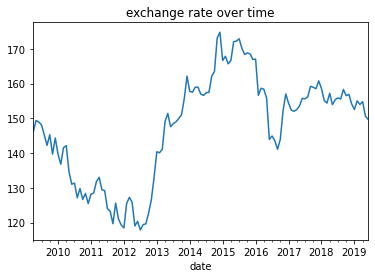

In [37]:
merged_df_jap["USDJPY"].plot(title='exchange rate over time')

plt.show()

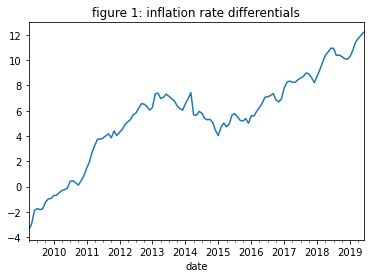

In [38]:
# diff_consumer
merged_df_jap["diff_consumer"].plot(title='figure 1: inflation rate differentials')

plt.show()

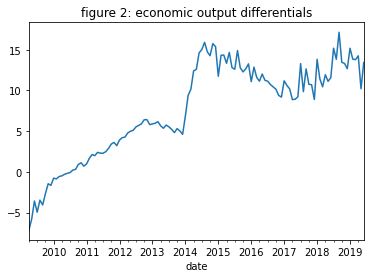

In [39]:
# diff_production
merged_df_jap["diff_production"].plot(title='figure 2: economic output differentials')

plt.show()

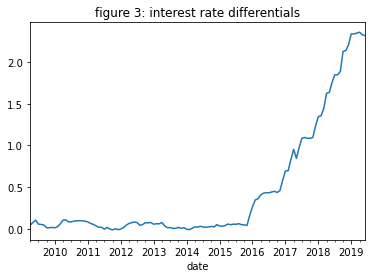

In [40]:
# diff_money_market
merged_df_jap["diff_money_market"].plot(title='figure 3: interest rate differentials')

plt.show()

## JAPAN

In [41]:
merged_df_jap["return"]=merged_df_jap.USDJPY.pct_change()
merged_df_jap['return']

date
2009-04-01         NaN
2009-05-01    0.021879
2009-06-01   -0.003017
2009-07-01   -0.005755
2009-08-01   -0.019618
                ...   
2019-02-01    0.016108
2019-03-01   -0.006688
2019-04-01    0.005225
2019-05-01   -0.026967
2019-06-01   -0.006089
Name: return, Length: 123, dtype: float64

In [42]:
merged_df_jap=pd.DataFrame({'USDJPY':merged_df_jap.USDJPY,
                            'diff_consumer':merged_df_jap.diff_consumer,
                            'diff_money_market':merged_df_jap.diff_money_market,
                            'diff_unmployee':merged_df_jap.diff_unmployee,
                            'diff_production':merged_df_jap.diff_production,
                            'VIX':merged_df_jap.VIX,
                            "return":merged_df_jap['return'],
                            "position":np.zeros(len(merged_df_jap))},index=merged_df_jap.index)
for i in range(len(merged_df_jap)):
    if merged_df_jap["return"][i]>0:
        merged_df_jap["position"][i]=1
    else:
        merged_df_jap["position"][i]= -1
merged_df_jap=merged_df_jap[1:]

In [43]:
merged_df_jap

,USDJPY,diff_consumer,diff_money_market,diff_unmployee,diff_production,VIX,return,position
date,,,,,,,,
2009-05-01,149.386817,-2.944395,0.07800,-91.332037,-5.797089,-0.207671,0.021879,1.0
2009-06-01,148.936104,-1.894732,0.10600,-90.311445,-3.579037,-0.088866,-0.003017,-1.0
2009-07-01,148.078996,-1.740746,0.05800,-90.749684,-4.953318,-0.016319,-0.005755,-1.0
2009-08-01,145.174021,-1.830069,0.05400,-90.812037,-3.471230,0.003472,-0.019618,-1.0
2009-09-01,142.229278,-1.768159,0.04800,-91.019684,-4.067276,-0.015379,-0.020284,-1.0
...,...,...,...,...,...,...,...,...
2019-02-01,155.021529,10.772491,2.33594,-96.427420,13.837456,-0.112855,0.016108,1.0
2019-03-01,153.984765,11.426453,2.34594,-96.090985,13.781438,-0.067347,-0.006688,-1.0
2019-04-01,154.789323,11.727327,2.35594,-96.593698,14.245574,-0.043034,0.005225,1.0


In [44]:
merged_df_jap["strategy_return"]=merged_df_jap["position"].shift()*merged_df_jap["return"]
#merged_df_jap['cumulative'] = np.append(0, np.cumsum(merged_df_jap['strategy_return']))

In [45]:
merged_df_jap=merged_df_jap[1:]


In [46]:
cumulative = np.append(0, np.cumsum(merged_df_jap['strategy_return']))
cumulative

array([ 0.        , -0.00301709,  0.00273778,  0.02235552,  0.04263975,
        0.02116072, -0.01739116, -0.05059732, -0.08300693, -0.06251838,
       -0.09755845, -0.0936049 , -0.14657908, -0.1200129 , -0.12246555,
       -0.15463647, -0.17556208, -0.19969067, -0.21342558, -0.23646605,
       -0.25815872, -0.25533986, -0.2297802 , -0.22057831, -0.24759553,
       -0.24578788, -0.20564684, -0.1996668 , -0.17051209, -0.22011786,
       -0.25598023, -0.24129688, -0.23392172, -0.29346545, -0.27940776,
       -0.29064935, -0.23645913, -0.24766225, -0.26814863, -0.28109343,
       -0.27920434, -0.25359589, -0.22218283, -0.17101339, -0.11576615,
       -0.11774615, -0.12529728, -0.06904658, -0.05340919, -0.07865002,
       -0.08462814, -0.08115161, -0.07471105, -0.06751631, -0.03713697,
        0.0048745 , -0.02235352, -0.02095301, -0.03010867, -0.03011247,
       -0.01776745, -0.01518129, -0.02021914, -0.01968623,  0.01002474,
        0.01809426,  0.07700305,  0.08680148,  0.04036162,  0.03

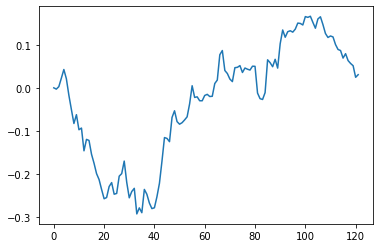

In [47]:
plt.plot(cumulative) 
plt.show() 

## LASSO/ E/ Ridge without VIX

In [54]:
import statsmodels.api as sm

In [55]:
merged_df_jap.head()

,USDJPY,diff_consumer,diff_money_market,diff_unmployee,diff_production,VIX,return,position,strategy_return
date,,,,,,,,,
2009-06-01,148.936104,-1.894732,0.106,-90.311445,-3.579037,-0.088866,-0.003017,-1.0,-0.003017
2009-07-01,148.078996,-1.740746,0.058,-90.749684,-4.953318,-0.016319,-0.005755,-1.0,0.005755
2009-08-01,145.174021,-1.830069,0.054,-90.812037,-3.471230,0.003472,-0.019618,-1.0,0.019618
2009-09-01,142.229278,-1.768159,0.048,-91.019684,-4.067276,-0.015379,-0.020284,-1.0,0.020284
2009-10-01,145.284225,-1.258335,0.014,-90.228501,-2.676940,0.198360,0.021479,1.0,-0.021479


In [56]:
X=merged_df_jap[['USDJPY','diff_consumer','diff_money_market','diff_unmployee','VIX']]
Y=merged_df_jap[["strategy_return"]]

In [57]:
ols_fit = sm.OLS(Y,X).fit()

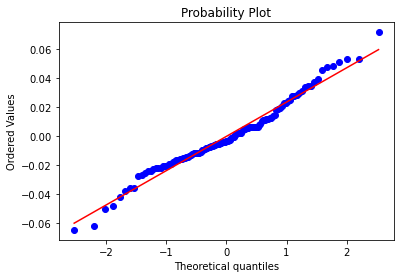

In [58]:
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(ols_fit.resid, plot = axA, fit=True)

In [59]:
reg = smf.ols(formula = 'USDJPY ~ diff_consumer+diff_money_market+diff_production+diff_unmployee+VIX', data =merged_df_jap).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 USDJPY   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     46.67
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           3.97e-26
Time:                        10:42:01   Log-Likelihood:                -434.01
No. Observations:                 121   AIC:                             880.0
Df Residuals:                     115   BIC:                             896.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -257.4239     64.438     -3.995      0.000    -385.063    -129.785
diff_consumer        -4.9371      0.646     -7.641      0.000      -6.217      -3.657
diff_money_market    -0.9037      1.814     -0.498      0.619      -4.497       2.690
diff_production       3.4766      0.259     13.426      0.000       2.964       3.990
diff_unmployee       -4.3474      0.711     -6.117      0.000      -5.755      -2.940
VIX                  -0.6033      3.390     -0.178      0.859      -7.318       6.111
==============================================================================
Omnibus:                        9.308   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.701
Skew:                          -0.063   Prob(JB):                        0.157
Kurtosis:                       2.153   Cond. No.                     7.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
merged_df_jap=merged_df_jap.dropna()

In [61]:
X2=merged_df_jap.drop(['VIX','USDJPY',"strategy_return","return","position"], axis=1)
y2 = merged_df_jap[['USDJPY']]

In [62]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, shuffle=False)

In [63]:
# Step 1 : Fit Lasso
lasso2 = Lasso().fit(X_train2, y_train2)

# Step 2 : Create a grid containing the potential values of lambdas
lasso_lambdas2 = {'alpha':np.linspace(0.001, 0.1, 20)}

In [64]:
lasso_best2 = GridSearchCV(lasso2, lasso_lambdas2, cv=5, scoring = 'neg_mean_squared_error').fit(X_train2, y_train2)

In [65]:
lasso_best2
lasso_best2.best_estimator_

Lasso(alpha=0.1)

In [66]:
X.columns.values.tolist()

['USDJPY', 'diff_consumer', 'diff_money_market', 'diff_unmployee', 'VIX']

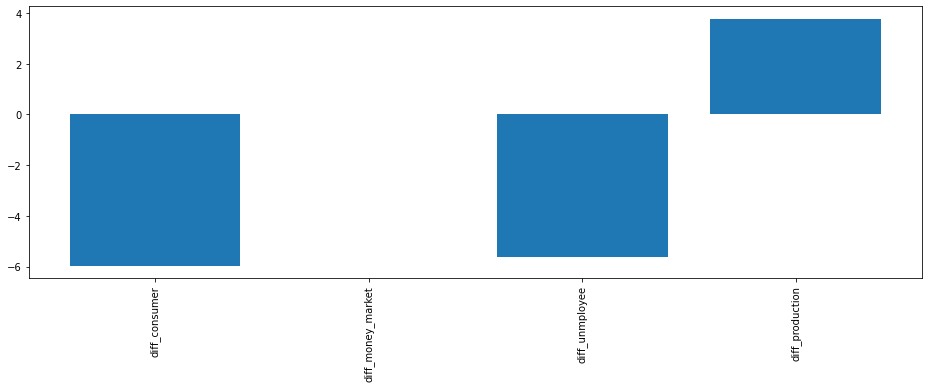

In [67]:
# Step 4 : See the magnitude of the coefficients
lasso_coef = lasso_best2.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X2.columns.values.tolist(), lasso_coef.tolist())
plt.xticks(rotation='vertical')
plt.show()

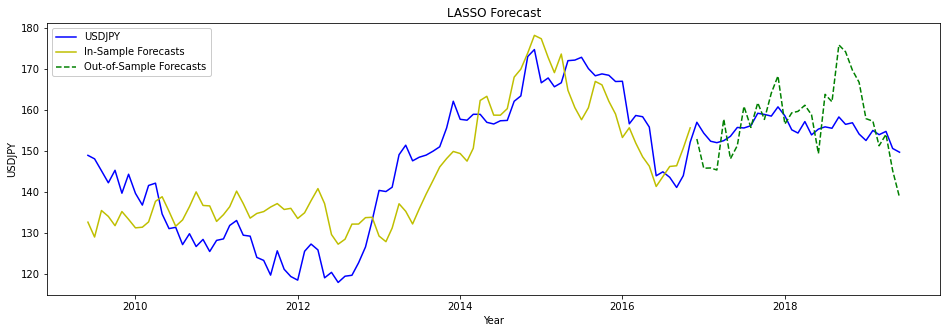

In [68]:
# Step 5 : Forecast using the test data
y_pred_in2 = lasso_best2.predict(X_train2)
y_pred_out2 = lasso_best2.predict(X_test2)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y2.index, y2, color='b', label='USDJPY')
plt.plot(y_train2.index, y_pred_in2, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test2.index, y_pred_out2, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="LASSO Forecast", xlabel="Year", ylabel="USDJPY")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [69]:
# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train2, y_pred_in2),6)
out_sample_mse = round(mean_squared_error(y_test2, y_pred_out2),6)
print('lasso In-Sample MSE : ', in_sample_mse ,'\nlasso Out-of-Sample MSE : ', out_sample_mse)

lasso In-Sample MSE :  88.880997 
lasso Out-of-Sample MSE :  56.515606


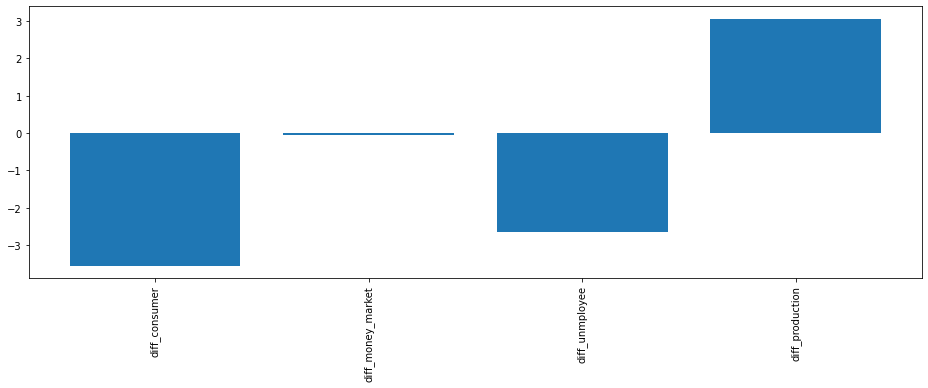

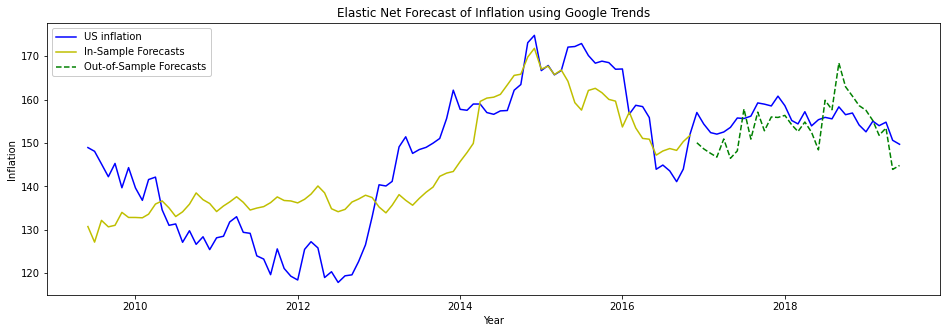

Elastic Net In-Sample MSE :  100.733768 
Elastic Net Out-of-Sample MSE :  22.955287


In [70]:
# Step 1 : Fit Elastic Net
eNet = ElasticNet().fit(X_train2, y_train2)

# Step 2 : Create a grid containing the potential values of lambdas, alpha
eNet_params = {'alpha':np.linspace(0.01, 0.60, 60), 'l1_ratio':np.linspace(0.0, 1.0, 60)}

# Step 3 : Among the grid of params, select the lambda and alpha that gives you the least error rate using cross-validation
eNet_best = GridSearchCV(eNet, eNet_params, cv=5, scoring = 'neg_mean_squared_error').fit(X_train2, y_train2)

# attribute of the eNet_best object
eNet_best.best_estimator_

# Step 4 : See the magnitude of the coefficients
eNet_coef = eNet_best.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X2.columns.values.tolist(), eNet_coef.tolist())
plt.xticks(rotation='vertical')
plt.show()

# Step 5 : Forecast using the test data
y_pred_in = eNet_best.predict(X_train2)
y_pred_out = eNet_best.predict(X_test2)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y2.index, y2, color='b', label='USDJPY'')
plt.plot(y_train2.index, y_pred_in, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test2.index, y_pred_out, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="Elastic Net Forecast of Inflation using Google Trends", xlabel="Year", ylabel="Inflation")
plt.legend(framealpha=1, frameon=True)
plt.show()

# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train2, y_pred_in),6)
out_sample_mse = round(mean_squared_error(y_test2, y_pred_out),6)
print('Elastic Net In-Sample MSE : ', in_sample_mse ,'\nElastic Net Out-of-Sample MSE : ', out_sample_mse)

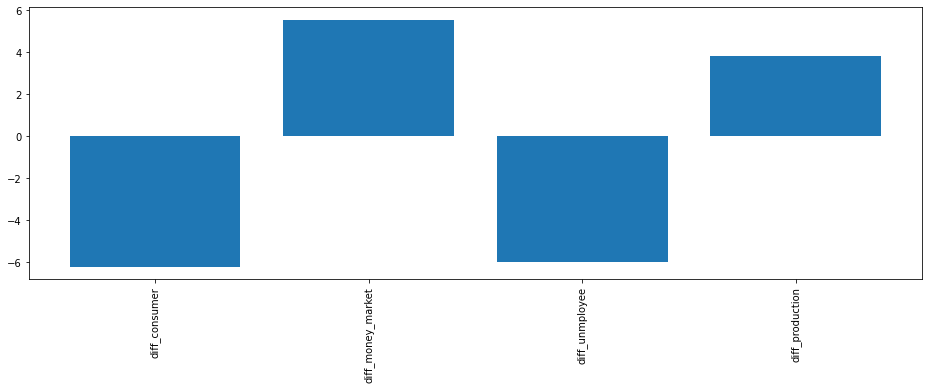

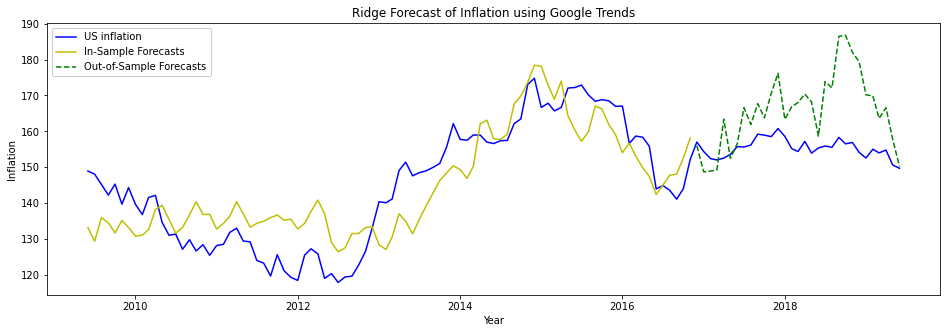

Ridge In-Sample MSE :  88.366659 
Ridge Out-of-Sample MSE :  191.26639


In [117]:
# Step 1 : Fit Ridge
ridge = Ridge().fit(X_train2, y_train2)

# Step 2 : Create a grid containing the potential values of lambdas
ridge_lambdas = {'alpha':np.linspace(0.001, 0.1, 20)}

# Step 3 : Among the grid of lambdas, select the lambda that gives you the least error rate using cross-validation
ridge_best = GridSearchCV(ridge, ridge_lambdas, cv=5, scoring = 'neg_mean_squared_error').fit(X_train2, y_train2)

ridge_best
ridge_best.best_estimator_

# Step 4 : See the magnitude of the coefficients
ridge_coef = ridge_best.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X2.columns.values.tolist(), ridge_coef.flatten().tolist())
plt.xticks(rotation='vertical')
plt.show()

# Step 5 : Forecast using the test data
y_pred_in2 = ridge_best.predict(X_train2)
y_pred_out2 = ridge_best.predict(X_test2)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y2.index, y2, color='b', label='USDJPY')
plt.plot(y_train2.index, y_pred_in2, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test2.index, y_pred_out2, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="Ridge Forecast of Inflation using Google Trends", xlabel="Year", ylabel="Inflation")
plt.legend(framealpha=1, frameon=True)
plt.show()

# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train2, y_pred_in2),6)
out_sample_mse = round(mean_squared_error(y_test2, y_pred_out2),6)
print('Ridge In-Sample MSE : ', in_sample_mse ,'\nRidge Out-of-Sample MSE : ', out_sample_mse)

### Elastic Net wins

In [72]:
merged_df_jap

,USDJPY,diff_consumer,diff_money_market,diff_unmployee,diff_production,VIX,return,position,strategy_return
date,,,,,,,,,
2009-06-01,148.936104,-1.894732,0.10600,-90.311445,-3.579037,-0.088866,-0.003017,-1.0,-0.003017
2009-07-01,148.078996,-1.740746,0.05800,-90.749684,-4.953318,-0.016319,-0.005755,-1.0,0.005755
2009-08-01,145.174021,-1.830069,0.05400,-90.812037,-3.471230,0.003472,-0.019618,-1.0,0.019618
2009-09-01,142.229278,-1.768159,0.04800,-91.019684,-4.067276,-0.015379,-0.020284,-1.0,0.020284
2009-10-01,145.284225,-1.258335,0.01400,-90.228501,-2.676940,0.198360,0.021479,1.0,-0.021479
...,...,...,...,...,...,...,...,...,...
2019-02-01,155.021529,10.772491,2.33594,-96.427420,13.837456,-0.112855,0.016108,1.0,-0.016108
2019-03-01,153.984765,11.426453,2.34594,-96.090985,13.781438,-0.067347,-0.006688,-1.0,-0.006688
2019-04-01,154.789323,11.727327,2.35594,-96.593698,14.245574,-0.043034,0.005225,1.0,-0.005225


In [73]:
cumulative = np.append(0,np.cumsum(merged_df_jap['strategy_return']))

In [74]:
merged_df_jap["forecast_USDJPY"]=eNet_best.predict(X2)
merged_df_jap["forecast_return"]=merged_df_jap.forecast_USDJPY.pct_change()

In [75]:
ENet_forecast=pd.DataFrame({'USDJPY':merged_df_jap.USDJPY,
                            'diff_consumer':merged_df_jap.diff_consumer,
                            'diff_money_market':merged_df_jap.diff_money_market,
                            'diff_production':merged_df_jap.diff_production,
                            'diff_unmployee':merged_df_jap.diff_unmployee,
                            "forecast_return":merged_df_jap['forecast_return'],
                            "position":np.zeros(len(merged_df_jap))},index=merged_df_jap.index)
for i in range(len(merged_df_jap)):
    if merged_df_jap["forecast_return"][i]>0:
        ENet_forecast["position"][i]=1
    else:
        ENet_forecast["position"][i]= -1

In [76]:
ENet_forecast.head()

,USDJPY,diff_consumer,diff_money_market,diff_production,diff_unmployee,forecast_return,position
date,,,,,,,
2009-06-01,148.936104,-1.894732,0.106,-3.579037,-90.311445,NaN,-1.0
2009-07-01,148.078996,-1.740746,0.058,-4.953318,-90.749684,-0.027424,-1.0
2009-08-01,145.174021,-1.830069,0.054,-3.471230,-90.812037,0.039396,1.0
2009-09-01,142.229278,-1.768159,0.048,-4.067276,-91.019684,-0.011290,-1.0
2009-10-01,145.284225,-1.258335,0.014,-2.676940,-90.228501,0.002722,1.0


In [77]:
ENet_forecast["strategy_return"]=ENet_forecast["position"].shift()*ENet_forecast["forecast_return"]
cumulative2 = np.append(0,np.cumsum(ENet_forecast['strategy_return']))

In [78]:
ENet_forecast

,USDJPY,diff_consumer,diff_money_market,diff_production,diff_unmployee,forecast_return,position,strategy_return
date,,,,,,,,
2009-06-01,148.936104,-1.894732,0.10600,-3.579037,-90.311445,NaN,-1.0,NaN
2009-07-01,148.078996,-1.740746,0.05800,-4.953318,-90.749684,-0.027424,-1.0,0.027424
2009-08-01,145.174021,-1.830069,0.05400,-3.471230,-90.812037,0.039396,1.0,-0.039396
2009-09-01,142.229278,-1.768159,0.04800,-4.067276,-91.019684,-0.011290,-1.0,-0.011290
2009-10-01,145.284225,-1.258335,0.01400,-2.676940,-90.228501,0.002722,1.0,-0.002722
...,...,...,...,...,...,...,...,...
2019-02-01,155.021529,10.772491,2.33594,13.837456,-96.427420,-0.015125,-1.0,0.015125
2019-03-01,153.984765,11.426453,2.34594,13.781438,-96.090985,-0.021761,-1.0,0.021761
2019-04-01,154.789323,11.727327,2.35594,14.245574,-96.593698,0.011063,1.0,-0.011063


In [79]:
len(cumulative2)

122

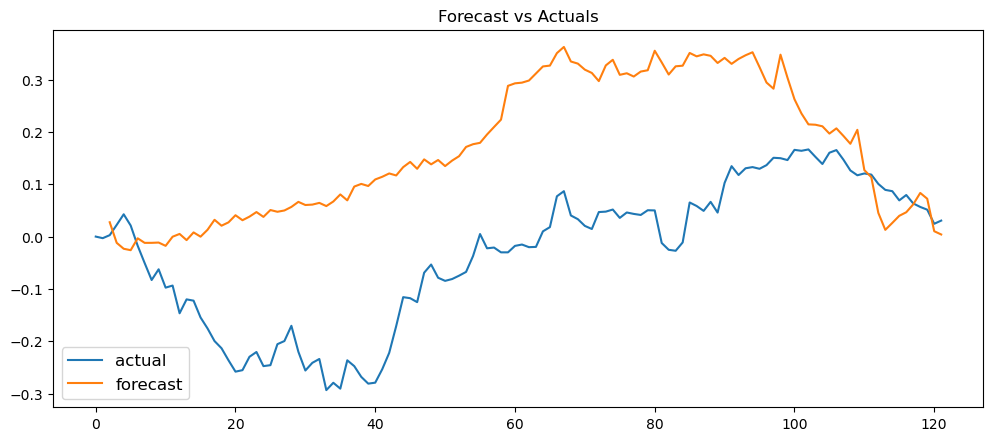

In [80]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cumulative, label='actual')
plt.plot(cumulative2, label='forecast')
plt.title("Forecast vs Actuals")
plt.legend(loc='lower left', fontsize=12)
plt.show()

In [81]:
# import the SPY and AAPL
import pandas_datareader as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [82]:
# Import and clean data

# Create the start and end date for API requests
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2020, 1, 1)

# Let's create a function to load in a time series for us
def loadAssetSeries(ticker, series_name, start, end):
    df = web.DataReader(ticker, 'yahoo', start, end)
    df = df[['Adj Close']]
    df = df.rename(columns = {'Adj Close': series_name})
    df[series_name + "_daily_return"] = df[series_name].pct_change()
    df = df[1:]
    df.index.rename("DATE", inplace=True)
    return(df)

# Let's get the S&P 500 price from Yahoo finance and clean it up.
#    Technically this the price of an ETF called SPY 
#    but it has near correlation of 1 with the actual S&P500
df5 = loadAssetSeries("SPY", "SP500", start, end)



In [83]:
df5.head()

,SP500,SP500_daily_return
DATE,,
2009-01-05,71.756020,-0.001183
2009-01-06,72.235153,0.006677
2009-01-07,70.071289,-0.029956
2009-01-08,70.357201,0.004080
2009-01-09,68.850235,-0.021419


In [84]:
# Data is ~daily returns; let's get monthly returns
df_sp500 = df5.resample("M").last()
df_sp500 = df_sp500[['SP500']]
df_sp500['SP500_monthly_return'] = df_sp500.SP500.pct_change()
#df_m['AAPL_monthly_return'] = df_m.AAPL.pct_change()
df_sp500.head() 

,SP500,SP500_monthly_return
DATE,,
2009-01-31,64.012390,NaN
2009-02-28,57.134308,-0.107449
2009-03-31,61.894199,0.083311
2009-04-30,68.043159,0.099346
2009-05-31,72.020546,0.058454


In [85]:
sp500=pd.DataFrame({'SP500':df_sp500.SP500,
                            'SP500_monthly_return':df_sp500.SP500_monthly_return,
                            "position":np.zeros(len(df_sp500))},index=df_sp500.index)
for i in range(len(df_sp500)):
    if df_sp500["SP500_monthly_return"][i]>0:
        sp500["position"][i]=1
    else:
        sp500["position"][i]= -1

In [86]:
sp500.head()

,SP500,SP500_monthly_return,position
DATE,,,
2009-01-31,64.012390,NaN,-1.0
2009-02-28,57.134308,-0.107449,-1.0
2009-03-31,61.894199,0.083311,1.0
2009-04-30,68.043159,0.099346,1.0
2009-05-31,72.020546,0.058454,1.0


In [87]:
sp500["strategy_return"]=sp500["position"].shift()*sp500["SP500_monthly_return"]

In [88]:
cumulative3 = np.append(0,np.cumsum(sp500["strategy_return"]))

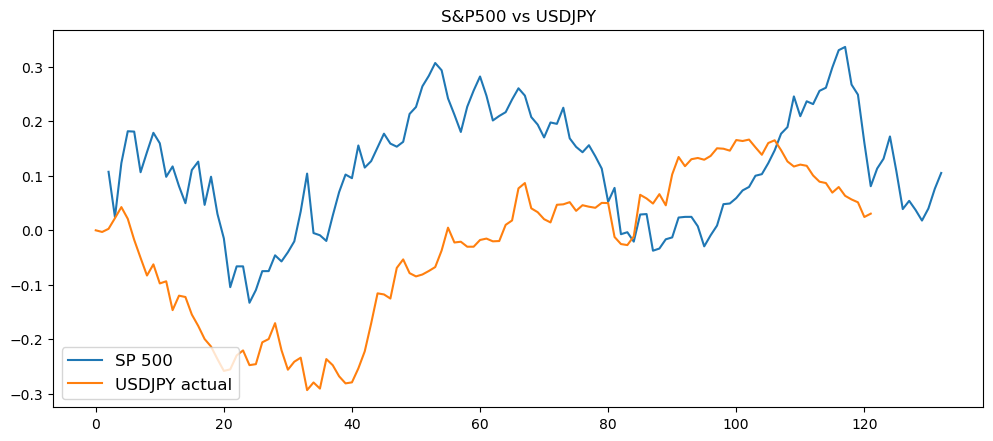

In [89]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cumulative3, label='SP 500')
plt.plot(cumulative, label='USDJPY actual')
plt.title("S&P500 vs USDJPY")
plt.legend(loc='lower left', fontsize=12)
plt.show()

In [90]:
def skewness(returns):
    n = len(returns)
    mean = returns.mean()
    std = np.sqrt(np.sum(np.square(returns - mean))/(n-1))
    skewness = np.mean(np.power((returns - mean)/std, 3))
    return(skewness)

In [91]:
skewness(sp500["strategy_return"])

-0.4533500777842514

In [92]:
skewness(ENet_forecast["strategy_return"])

-0.6122771869264712

In [93]:
print("ENet: Skewness: ",skewness(ENet_forecast["strategy_return"]))
print("S&P 500: Skewness: ",skewness(sp500["strategy_return"]))

ENet: Skewness:  -0.6122771869264712
S&P 500: Skewness:  -0.4533500777842514


In [94]:
def sharpe_ratio(returns, rfr):
    excess_returns = returns - rfr
    n = len(excess_returns)
    mean = excess_returns.mean()
    # use unbiased sd
    std = np.sqrt(np.sum(np.square(excess_returns - mean))/(n-1))
    return(mean/std)

In [95]:
monthly_risk_free_rate=0.02

In [96]:
print("ENet Model: Sharp Ratio: ",sharpe_ratio(ENet_forecast["strategy_return"], monthly_risk_free_rate))
print("S&P 500: Sharp Ratio: ",sharpe_ratio(sp500["strategy_return"], monthly_risk_free_rate))

ENet Model: Sharp Ratio:  -0.9710591731694019
S&P 500: Sharp Ratio:  -0.4761909184396159


## return

In [97]:
print("ENet: Mean Return: ",ENet_forecast["strategy_return"].mean())
print("S&P 500: Mean Return: ",sp500["strategy_return"].mean())

ENet: Mean Return:  3.364055308277732e-05
S&P 500: Mean Return:  0.0008036614804937623


In [98]:
def plot_returns(df, column, title):
    n, bins, patches = plt.hist(x=df[column], bins='auto', 
                                color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.ylabel(None)
    plt.title(title)
    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

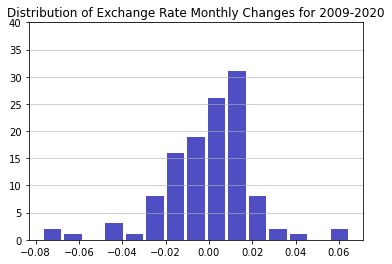

In [99]:
title = 'Distribution of Exchange Rate Monthly Changes for 2009-2020'
plot_returns(ENet_forecast, "strategy_return", title)

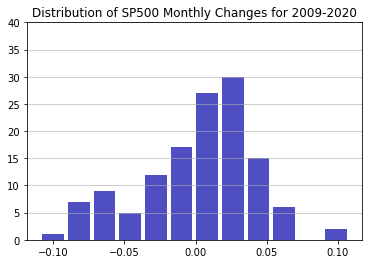

In [100]:
title = 'Distribution of SP500 Monthly Changes for 2009-2020'
plot_returns(sp500, "strategy_return", title)

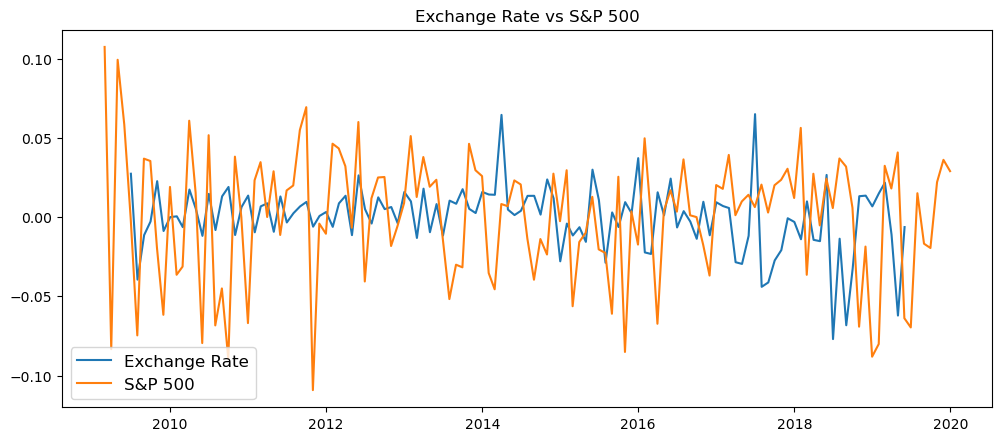

In [101]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ENet_forecast["strategy_return"], label='Exchange Rate')
plt.plot(sp500["strategy_return"], label='S&P 500')
plt.title("Exchange Rate vs S&P 500")
plt.legend(loc='lower left', fontsize=12)
plt.show()

## Australia

In [102]:
merged_df_aus

,USDAUS,diff_export,diff_consumer,diff_rate,diff_unemployee,VIX
date,,,,,,
2009-04-01,2.061708,-0.755584,1.121617,-2.91,3.04,-0.173086
2009-05-01,1.956585,-0.349492,1.404114,-2.82,3.22,-0.207671
2009-06-01,1.913022,0.625127,2.246560,-2.79,3.95,-0.088866
2009-07-01,1.875776,9.470254,1.149719,-2.84,4.46,-0.016319
2009-08-01,1.865915,10.038782,1.371223,-2.84,4.07,0.003472
...,...,...,...,...,...,...
2019-02-01,1.956305,-17.502561,-2.807708,0.90,-1.31,-0.112855
2019-03-01,1.958869,-17.054356,-2.153746,0.91,-1.49,-0.067347
2019-04-01,1.968688,-21.280640,-2.264880,0.92,-1.95,-0.043034


In [103]:
x_aus=merged_df_aus[['diff_export','diff_consumer',"diff_rate","diff_unemployee","VIX"]]
y_aus=merged_df_aus[['USDAUS']]

In [104]:
X_train_aus, X_test_aus, Y_train_aus, Y_test_aus = train_test_split(x_aus, y_aus, test_size = 0.25, shuffle=False)

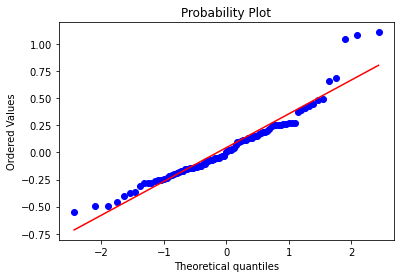

In [105]:
ols_fit = sm.OLS(Y_train_aus,X_train_aus).fit()
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(ols_fit.resid, plot = axA, fit=True)

In [106]:
reg = smf.ols(formula = 'USDAUS ~ diff_export+diff_consumer+diff_rate+diff_unemployee+VIX', data =merged_df_aus).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 USDAUS   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     34.36
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.80e-21
Time:                        10:43:49   Log-Likelihood:                 101.18
No. Observations:                 123   AIC:                            -190.4
Df Residuals:                     117   BIC:                            -173.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.8826      0.033     56.225      0.000       1.816       1.949
diff_export         0.0028      0.001      2.272      0.025       0.000       0.005
diff_consumer      -0.0234      0.013     -1.786      0.077      -0.049       0.003
diff_rate           0.1037      0.015      6.845      0.000       0.074       0.134
diff_unemployee     0.0335      0.015      2.247      0.027       0.004       0.063
VIX                 0.0231      0.041      0.566      0.573      -0.058       0.104
==============================================================================
Omnibus:                       10.504   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               17.907
Skew:                           0.353   Prob(JB):                     0.000129
Kurtosis:                       4.731   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
X3=merged_df_aus.drop(['VIX','USDAUS'], axis=1)
y3 = merged_df_aus[['USDAUS']]

In [112]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.25, shuffle=False)
# Step 1 : Fit Lasso
lasso = Lasso().fit(X_train3, y_train3)

# Step 2 : Create a grid containing the potential values of lambdas
lasso_lambdas = {'alpha':np.linspace(0.001, 0.1, 20)}

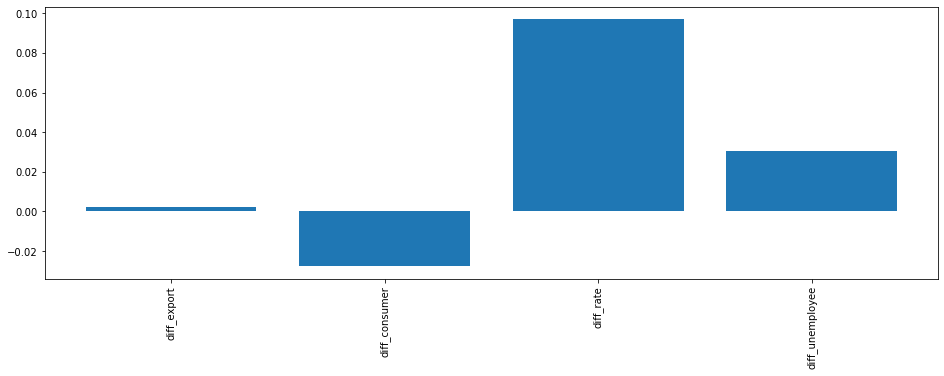

In [113]:
lasso_best = GridSearchCV(lasso, lasso_lambdas, cv=5, scoring = 'neg_mean_squared_error').fit(X_train, y_train)
lasso_best
lasso_best.best_estimator_
X2.columns.values.tolist()
# Step 4 : See the magnitude of the coefficients
lasso_coef = lasso_best.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X3.columns.values.tolist(), lasso_coef.tolist())
plt.xticks(rotation='vertical')
plt.show()

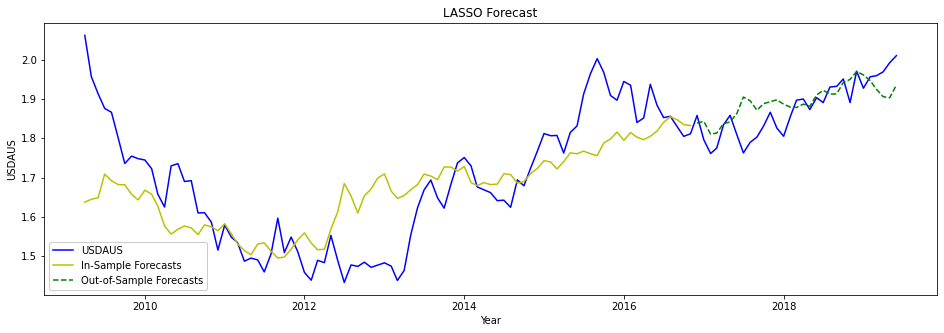

LASSO In-Sample MSE :  0.014343 
LASSO Out-of-Sample MSE :  0.002832


In [114]:
# Step 5 : Forecast using the test data
y_pred_in3 = lasso_best.predict(X_train3)
y_pred_out3 = lasso_best.predict(X_test3)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y3.index, y3, color='b', label='USDAUS')
plt.plot(y_train3.index, y_pred_in3, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test3.index, y_pred_out3, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="LASSO Forecast", xlabel="Year", ylabel="USDAUS")
plt.legend(framealpha=1, frameon=True)
plt.show()

# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train3, y_pred_in3),6)
out_sample_mse = round(mean_squared_error(y_test3, y_pred_out3),6)
print('LASSO In-Sample MSE : ', in_sample_mse ,'\nLASSO Out-of-Sample MSE : ', out_sample_mse)

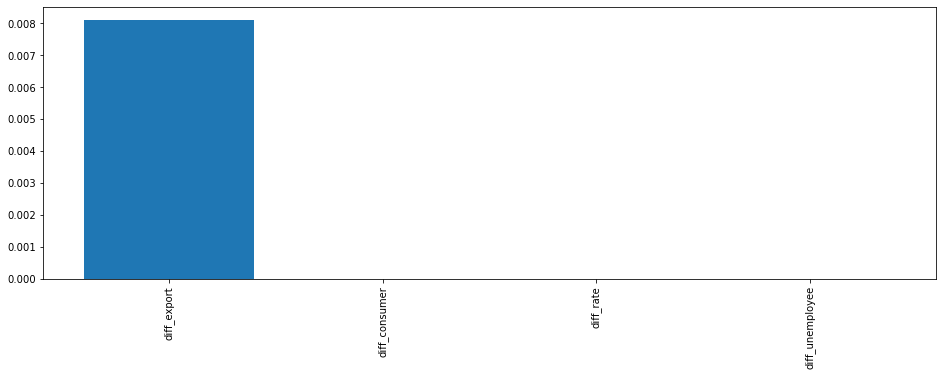

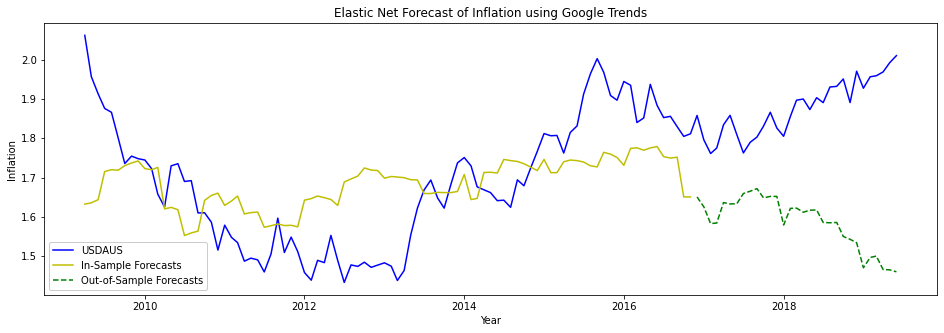

Elastic Net In-Sample MSE :  0.02058 
Elastic Net Out-of-Sample MSE :  0.099792


In [118]:
# Step 1 : Fit Elastic Net
eNet = ElasticNet().fit(X_train3, y_train3)

# Step 2 : Create a grid containing the potential values of lambdas, alpha
eNet_params = {'alpha':np.linspace(0.01, 0.60, 60), 'l1_ratio':np.linspace(0.0, 1.0, 60)}

# Step 3 : Among the grid of params, select the lambda and alpha that gives you the least error rate using cross-validation
eNet_best = GridSearchCV(eNet, eNet_params, cv=5, scoring = 'neg_mean_squared_error').fit(X_train3, y_train3)

# attribute of the eNet_best object
eNet_best.best_estimator_

# Step 4 : See the magnitude of the coefficients
eNet_coef = eNet_best.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X3.columns.values.tolist(), eNet_coef.tolist())
plt.xticks(rotation='vertical')
plt.show()

# Step 5 : Forecast using the test data
y_pred_in4 = eNet_best.predict(X_train3)
y_pred_out4 = eNet_best.predict(X_test3)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y3.index, y3, color='b', label='USDAUS')
plt.plot(y_train3.index, y_pred_in4, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test3.index, y_pred_out4, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="Elastic Net Forecast of Inflation using Google Trends", xlabel="Year", ylabel="Inflation")
plt.legend(framealpha=1, frameon=True)
plt.show()

# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train3, y_pred_in4),6)
out_sample_mse = round(mean_squared_error(y_test3, y_pred_out4),6)
print('Elastic Net In-Sample MSE : ', in_sample_mse ,'\nElastic Net Out-of-Sample MSE : ', out_sample_mse)

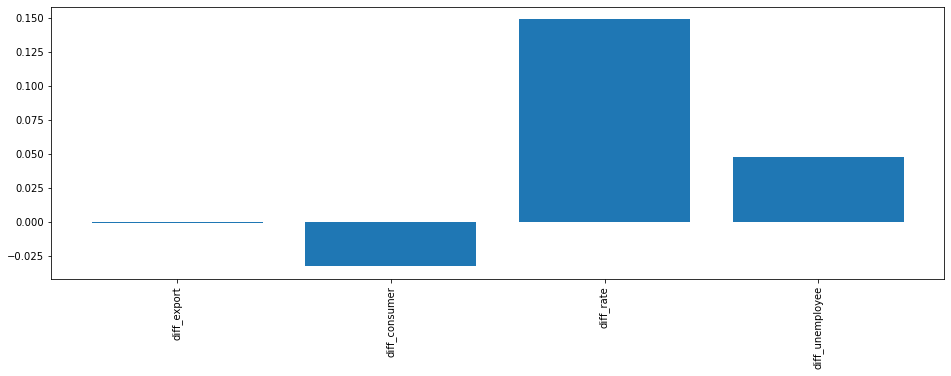

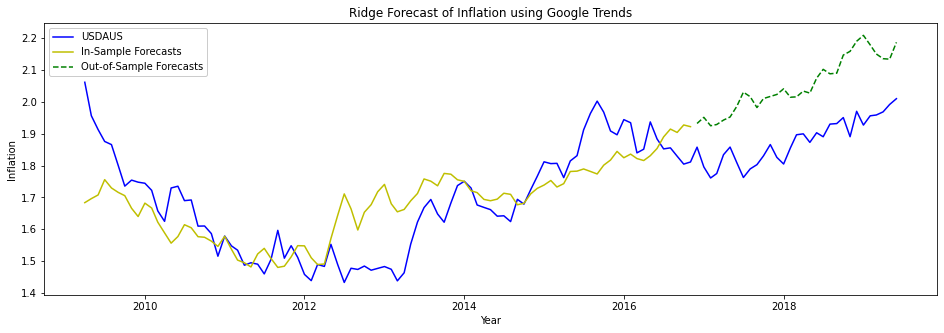

Ridge In-Sample MSE :  0.014343 
Ridge Out-of-Sample MSE :  0.002832


In [119]:
# Step 1 : Fit Ridge
ridge = Ridge().fit(X_train3, y_train3)

# Step 2 : Create a grid containing the potential values of lambdas
ridge_lambdas = {'alpha':np.linspace(0.001, 0.1, 20)}

# Step 3 : Among the grid of lambdas, select the lambda that gives you the least error rate using cross-validation
ridge_best = GridSearchCV(ridge, ridge_lambdas, cv=5, scoring = 'neg_mean_squared_error').fit(X_train3, y_train3)

ridge_best
ridge_best.best_estimator_

# Step 4 : See the magnitude of the coefficients
ridge_coef = ridge_best.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X3.columns.values.tolist(), ridge_coef.flatten().tolist())
plt.xticks(rotation='vertical')
plt.show()

# Step 5 : Forecast using the test data
y_pred_in5 = ridge_best.predict(X_train3)
y_pred_out5 = ridge_best.predict(X_test3)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y3.index, y3, color='b', label='USDAUS')
plt.plot(y_train3.index, y_pred_in5, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test3.index, y_pred_out5, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="Ridge Forecast of Inflation using Google Trends", xlabel="Year", ylabel="Inflation")
plt.legend(framealpha=1, frameon=True)
plt.show()

# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train3, y_pred_in3),6)
out_sample_mse = round(mean_squared_error(y_test3, y_pred_out3),6)
print('Ridge In-Sample MSE : ', in_sample_mse ,'\nRidge Out-of-Sample MSE : ', out_sample_mse)

## Lasso wins

## return

In [120]:
merged_df_aus["return"]=merged_df_aus.USDAUS.pct_change()
merged_df_aus.head()

,USDAUS,diff_export,diff_consumer,diff_rate,diff_unemployee,VIX,return
date,,,,,,,
2009-04-01,2.061708,-0.755584,1.121617,-2.91,3.04,-0.173086,NaN
2009-05-01,1.956585,-0.349492,1.404114,-2.82,3.22,-0.207671,-0.050989
2009-06-01,1.913022,0.625127,2.246560,-2.79,3.95,-0.088866,-0.022265
2009-07-01,1.875776,9.470254,1.149719,-2.84,4.46,-0.016319,-0.019470
2009-08-01,1.865915,10.038782,1.371223,-2.84,4.07,0.003472,-0.005257


In [121]:
merged_df_aus=pd.DataFrame({'USDAUS':merged_df_aus.USDAUS,
                            'diff_consumer':merged_df_aus.diff_consumer,
                            'diff_export':merged_df_aus.diff_export,
                            'diff_unemployee':merged_df_aus.diff_unemployee,
                            'diff_rate':merged_df_aus.diff_rate,
                            'VIX':merged_df_aus.VIX,
                            "return":merged_df_aus['return'],
                            "position":np.zeros(len(merged_df_aus))},index=merged_df_aus.index)
for i in range(len(merged_df_jap)):
    if merged_df_aus["return"][i]>0:
        merged_df_aus["position"][i]=1
    else:
        merged_df_aus["position"][i]= -1

merged_df_aus["strategy_return"]=merged_df_aus["position"].shift()*merged_df_aus["return"]

cumulative4 = np.append(0, np.cumsum(merged_df_aus['strategy_return']))

In [122]:
merged_df_aus["forecast_USDAUS"]=lasso_best.predict(X3)
merged_df_aus["forecast_return"]=merged_df_aus.forecast_USDAUS.pct_change()

In [123]:
lasso_forecast_aus=pd.DataFrame({'USDAUS':merged_df_aus.USDAUS,
                            'diff_consumer':merged_df_aus.diff_consumer,
                            'diff_export':merged_df_aus.diff_export,
                            'diff_unemployee':merged_df_aus.diff_unemployee,
                            'diff_rate':merged_df_aus.diff_rate,
                            "forecast_return":merged_df_aus['forecast_return'],
                            "position":np.zeros(len(merged_df_aus))},index=merged_df_aus.index)
for i in range(len(merged_df_aus)):
    if merged_df_aus["forecast_return"][i]>0:
        lasso_forecast_aus["position"][i]=1
    else:
        lasso_forecast_aus["position"][i]= -1

In [124]:
lasso_forecast_aus["strategy_return"]=lasso_forecast_aus["position"].shift()*lasso_forecast_aus["forecast_return"]
cumulative5 = np.append(0,np.cumsum(lasso_forecast_aus['strategy_return']))

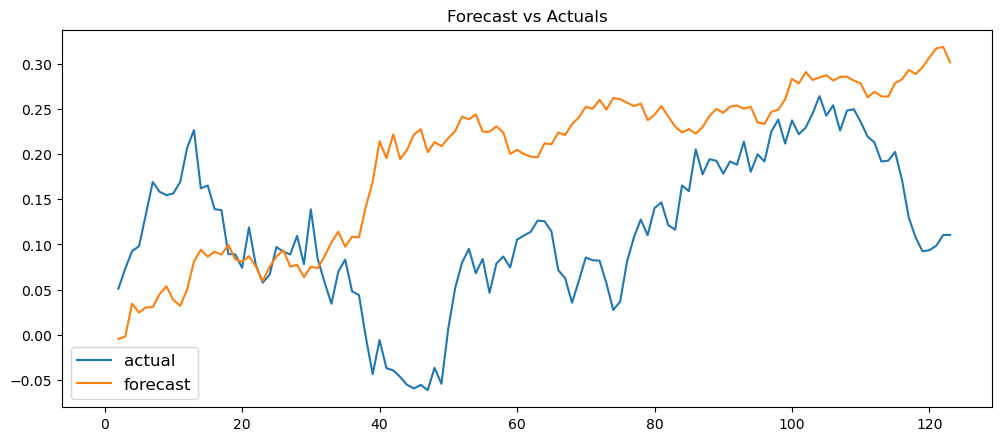

In [125]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cumulative4, label='actual')
plt.plot(cumulative5, label='forecast')
plt.title("Forecast vs Actuals")
plt.legend(loc='lower left', fontsize=12)
plt.show()

In [126]:
sp500.head()

,SP500,SP500_monthly_return,position,strategy_return
DATE,,,,
2009-01-31,64.012390,NaN,-1.0,NaN
2009-02-28,57.134308,-0.107449,-1.0,0.107449
2009-03-31,61.894199,0.083311,1.0,-0.083311
2009-04-30,68.043159,0.099346,1.0,0.099346
2009-05-31,72.020546,0.058454,1.0,0.058454


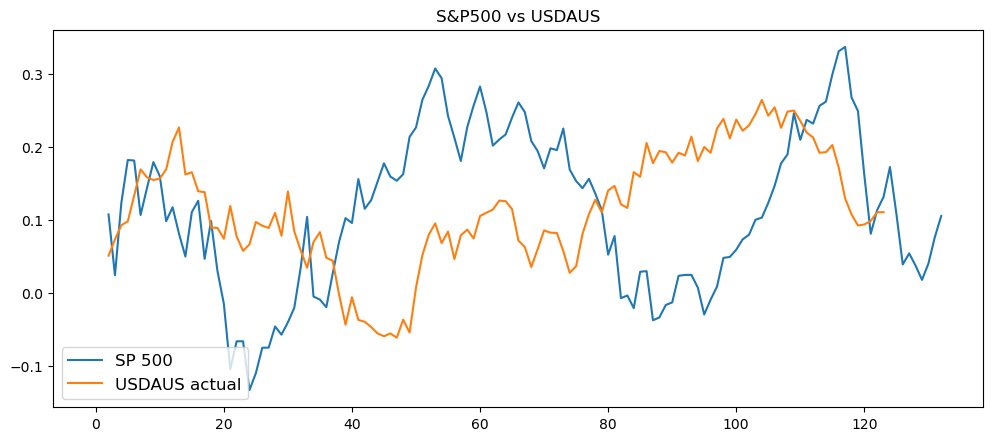

In [127]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cumulative3, label='SP 500')
plt.plot(cumulative4, label='USDAUS actual')
plt.title("S&P500 vs USDAUS")
plt.legend(loc='lower left', fontsize=12)
plt.show()

In [128]:
print("Lasso: Skewness: ",skewness(lasso_forecast_aus["strategy_return"]))
print("S&P 500: Skewness: ",skewness(sp500["strategy_return"]))

Lasso: Skewness:  0.28855728900847216
S&P 500: Skewness:  -0.4533500777842514


In [129]:
print("lasso Model: Sharp Ratio: ",sharpe_ratio(lasso_forecast_aus["strategy_return"], monthly_risk_free_rate))
print("S&P 500: Sharp Ratio: ",sharpe_ratio(sp500["strategy_return"], monthly_risk_free_rate))

lasso Model: Sharp Ratio:  -1.3972766100575742
S&P 500: Sharp Ratio:  -0.4761909184396159


In [130]:
print("lasso: Mean Return: ",lasso_forecast_aus["strategy_return"].mean())
print("S&P 500: Mean Return: ",sp500["strategy_return"].mean())

lasso: Mean Return:  0.0024719399493099573
S&P 500: Mean Return:  0.0008036614804937623


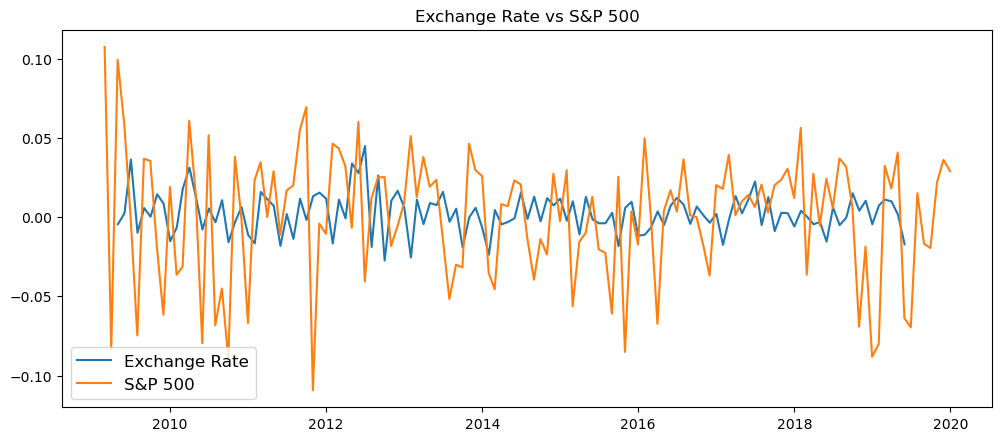

In [131]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(lasso_forecast_aus["strategy_return"], label='Exchange Rate')
plt.plot(sp500["strategy_return"], label='S&P 500')
plt.title("Exchange Rate vs S&P 500")
plt.legend(loc='lower left', fontsize=12)
plt.show()